In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
from matplotlib import ticker
import matplotlib.dates as mdates
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.simplefilter(action='ignore', category='SettingWithCopyWarning')

In [2]:
sys.path.append(os.getenv('DEV_HOME'))
sys.path.append(os.getenv('SITES_HOME'))

In [3]:
import covid_ont
from covid_ont import dataset_read, dataset_get, DIR_IMAGES

In [4]:
dataset_get('Vaccinations')

In [5]:
dataset_get('Cases by PHU')

In [6]:
df_cases=dataset_read('Cases by PHU')[['Date', 'Total']]
df_cases.columns=['Date', 'New Cases']

In [7]:
df_vac=dataset_read('Vaccinations')[['report_date', 'total_doses_administered']]
df_vac.columns=['Date', 'Total Doses Administered']

In [8]:
df_plot=pd.merge(df_vac, df_cases, on='Date')
df_plot.fillna(0, inplace=True)
df_plot['Fully Vaccinated Total']=df_plot['Total Doses Administered'].astype(int)
df_plot.drop(df_plot[df_plot['Total Doses Administered']==0].index, inplace=True)
df_plot['Date']=pd.to_datetime(df_plot['Date'])
df_plot.set_index('Date', inplace=True)

In [9]:
def make_plot(df_plot):
    f_plot='vaccases.png'
    last_updated=str(df_plot.index.max().strftime('%d-%b-%Y'))
    fig, ax1 = plt.subplots(1, 1, figsize=(17,7))
    plt.style.use('fast')
    ax2=ax1.twinx()
    df_plot.plot(ax=ax1, kind='area', alpha=0.8, y='New Cases', color='red', label='New Daily Cases')
    df_plot.plot(ax=ax2, kind='area', alpha=0.5, y='Total Doses Administered', color='green', label='Vaccinated (at least one dose)')
    ax1.set_xlabel('')
    ax1.legend(loc=0, bbox_to_anchor=(0.12, 1.08))
    ax2.legend(loc=1, bbox_to_anchor=(0.96, 1.08))
    ax1.spines['left'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
    ax1.xaxis.set_major_formatter(DateFormatter("%d-%b-%Y"))
    ax1.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.title('Total Doses Adminsitered vs. Daily New Cases', fontsize=18)
    plt.annotate(last_updated, xy=(550, 370), xycoords='figure points', color='red', fontsize=17) # last updated
    fig.savefig(DIR_IMAGES + f_plot, facecolor='oldlace')


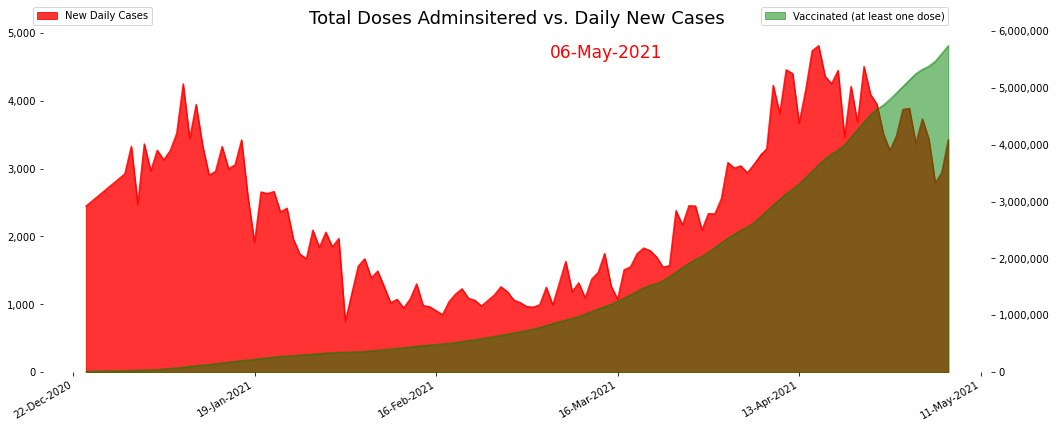

In [10]:
make_plot(df_plot)